## MSDS 455 Data Visualization
## Assignment 2 Categorical Data
## Melek Mizher
## Data used was sourced from the United Census Bureau
## All the data used in the visualizations below focus on Table H-04_1 Health Insurance Coverage Status and Type of Coverage by Selected Characteristics -- All Races: 2021
### https://www.census.gov/data/tables/time-series/demo/income-poverty/cps-hi/hi.html

# Required Dependencies

In [2]:
#Required Dependency to get data hosted in GitHub with Requests and Pandas
#!pip install openpyxl

OSError: out of pty devices

# Import Required Libraries

In [3]:
#Import
# For DataFrame Structure and Data Manipulation
import pandas as pd
# For Downloading the Dataset from GitHub
import requests
# For Data Visualization
import matplotlib.pyplot as plt
# To use Numpy Arrays to allow Indexing of values from DataFrames
import numpy as np
# Seaborn
import seaborn as sns

# Data Setup

### Obtain data from GitHub Repository to ensure notebook operates in other computers

In [7]:
#Link to raw file in Github to download the Pre-Processed Spreadsheet
url='https://github.com/MelekM/Mizher_MSDS455_Assignment2_CategoricalData/raw/main/Data/Census%20Data%20and%20Data_Of_Interest.xlsx'

#Downloading of the Spreadsheet using Requests Library
excel_data = requests.get(url)

### Extract Data of Interest From Specific Excel Sheet into a Pandas DataFrame

In [8]:
df = pd.read_excel(excel_data.content, sheet_name='Data_Of_Interest')

In [9]:
df

,Characteristic,Total_Population,Any_Insured,Private_Insured,Public_Insured,Uninsured
0,No high school diploma,13604,9491,4664,5222,4114
1,High school graduate (includes equivalency),45600,38437,27996,12035,7163
2,"Some college, no degree",23509,21003,16773,5194,2506
3,Associate's degree,17729,16233,13681,3197,1496
4,Bachelor's degree,41218,38974,36157,3691,2244
5,Graduate degree or higher,24150,23345,22261,1561,805
6,Native-born,281229,263172,190775,102229,18057
7,Foreign-born,46845,37715,25591,14865,9130
8,Naturalized citizen,22877,21078,14301,8863,1799
9,Not a citizen,23968,16637,11290,6003,7331


# Data Indexing as a Proportion of Total Population By Gender

In [7]:
#The Following Define Numpy Arrays with Percentage Values as Related to the Total Population
#Male
Male_HS_NonCompletion_Percentage = np.array(df.Male_No_HS/df.Total_Male_Pop)*100
Male_HS_Completion_Percentage = np.array(df.Male_HS/df.Total_Male_Pop)*100
Male_College_Completion_Percentage = np.array(df.Male_College/df.Total_Male_Pop)*100
#Female
Female_HS_NonCompletion_Percentage = np.array(df.Female_No_HS/df.Total_Female_Pop)*100
Female_HS_Completion_Percentage = np.array(df.Female_HS/df.Total_Female_Pop)*100
Female_College_Completion_Percentage =np.array(df.Female_College/df.Total_Female_Pop)*100
#Total
Total_HS_NonCompletion_Percentage = np.array((df.Male_No_HS+df.Female_No_HS)/df.Total_Pop)*100
Total_HS_Completion_Percentage = np.array((df.Male_HS+df.Female_HS)/df.Total_Pop)*100
Total_College_Completion_Percentage = np.array((df.Male_College+df.Female_College)/df.Total_Pop)*100

# Data Exploration and Visualization

### Imports

In [7]:
#Helps to Extract and Manipulate Minor Ticks from Plot
from matplotlib.ticker import AutoMinorLocator

## Compare Male vs Female Populations in Line Plots

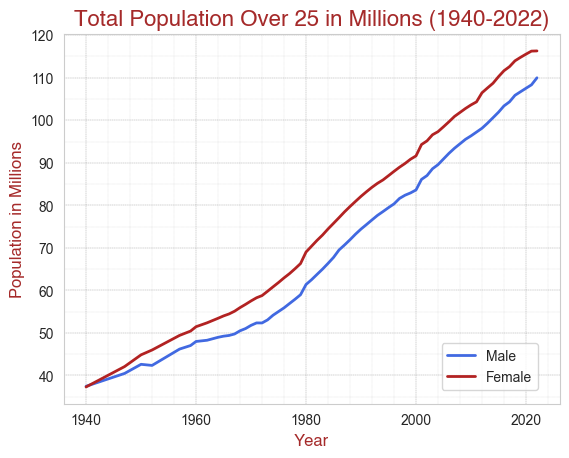

In [20]:
#Male Population from DataFrame to Numpy Array. Divided by 1000 to show data in Millions.
male_pop = np.array(df.Total_Male_Pop)/1000
#Female Population from DataFrame to Numpy Array. Divided by 1000 to show data in Millions.
female_pop = np.array(df.Total_Female_Pop)/1000
#Year from DataFrame to Numpy Array.
year = np.array(df.Year)

#Define Plot to only a single plot.
fig, ax = plt.subplots()

#Define Plotted Lines
#Defines Lines to be Plotted and assigns line widths and colors
ax.plot(year, male_pop, linewidth=2.0, color='royalblue', label='Male')
ax.plot(year, female_pop, linewidth=2.0, color='firebrick', label='Female')

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Total Population Over 25 in Millions (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population in Millions", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
ax.autoscale(enable=True, axis='both', tight=None)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
ax.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
ax.tick_params(which='minor', bottom=False, left=False)

# Remove border around plot.
#[ax.spines[side].set_visible(False) for side in ax.spines]
#Off as it does not fit this style of graph well. Kept for future purposes.

#Define number of Minor Gridlines.
#5 for X-Axis so that Minor Gridlines give a 2-year interval.
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#2 for Y-Axis so that Minor Gridlines are a 5 thousand interval.
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#Define the Legend and manipulate Location
fig.legend(loc='upper left', bbox_to_anchor=(0.705, 0.25), title='')

#ax.legend()

#Save graph
plt.savefig('population_over_time.png')

#Show the graph
plt.show()

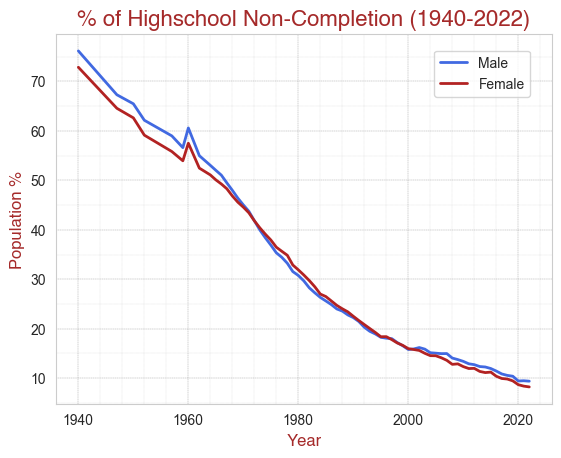

In [21]:
#Year from DataFrame to Numpy Array.
year = np.array(df.Year)

#Define Plot to only a single plot.
fig, ax = plt.subplots()

#Define Plotted Lines
#Defines Lines to be Plotted and assigns line widths and colors
ax.plot(year, Male_HS_NonCompletion_Percentage, linewidth=2.0, color='royalblue', label='Male')
ax.plot(year, Female_HS_NonCompletion_Percentage, linewidth=2.0, color='firebrick', label='Female')

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("% of Highschool Non-Completion (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
ax.autoscale(enable=True, axis='both', tight=None)

#Set Y Ticks to override Autoscale
#y_ticks = np.arange(5,35,5)
#ax.set_yticks(y_ticks)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
ax.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
ax.tick_params(which='minor', bottom=False, left=False)

# Remove border around plot.
#[ax.spines[side].set_visible(False) for side in ax.spines]
#Off as it does not fit this style of graph well. Kept for future purposes.

#Define number of Minor Gridlines.
#5 for X-Axis so that Minor Gridlines give a 2-year interval.
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#2 for Y-Axis so that Minor Gridlines are a 5 thousand interval.
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#Define the Legend and manipulate Location
fig.legend(loc='upper left', bbox_to_anchor=(0.705, 0.86), title='')

#ax.legend()

#Save graph
plt.savefig('no_hs_attainment_percentage.png')

#Show the graph
plt.show()

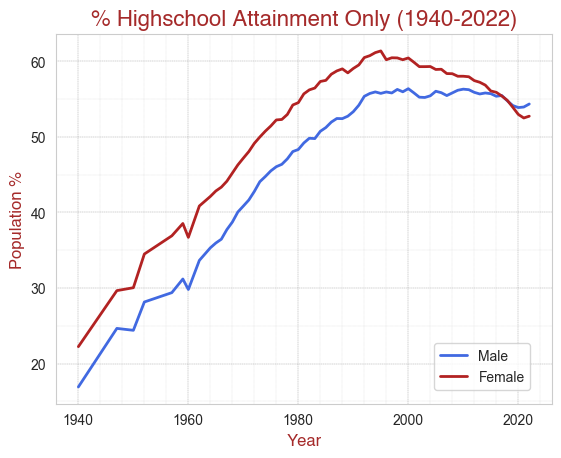

In [22]:
year = np.array(df.Year)

#Define Plot to only a single plot.
fig, ax = plt.subplots()

#Define Plotted Lines
#Defines Lines to be Plotted and assigns line widths and colors
ax.plot(year, Male_HS_Completion_Percentage, linewidth=2.0, color='royalblue', label='Male')
ax.plot(year, Female_HS_Completion_Percentage, linewidth=2.0, color='firebrick', label='Female')

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("% Highschool Attainment Only (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
ax.autoscale(enable=True, axis='both', tight=None)

#Set Y Ticks to override Autoscale
#y_ticks = np.arange(5,35,5)
#ax.set_yticks(y_ticks)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
ax.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
ax.tick_params(which='minor', bottom=False, left=False)

# Remove border around plot.
#[ax.spines[side].set_visible(False) for side in ax.spines]
#Off as it does not fit this style of graph well. Kept for future purposes.

#Define number of Minor Gridlines.
#5 for X-Axis so that Minor Gridlines give a 2-year interval.
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#2 for Y-Axis so that Minor Gridlines are a 5 thousand interval.
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#Define the Legend and manipulate Location
fig.legend(loc='upper left', bbox_to_anchor=(0.705, 0.25), title='')

#ax.legend()

#Save graph
plt.savefig('hs_attainment_percentage.png')

#Show the graph
plt.show()

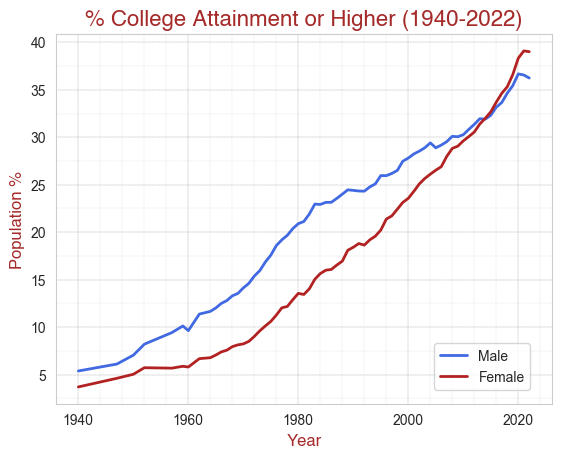

In [23]:
#Year from DataFrame to Numpy Array.
year = np.array(df.Year)

#Define Plot to only a single plot.
fig, ax = plt.subplots()

#Define Plotted Lines
#Defines Lines to be Plotted and assigns line widths and colors
ax.plot(year, Male_College_Completion_Percentage, linewidth=2.0, color='royalblue', label='Male')
ax.plot(year, Female_College_Completion_Percentage, linewidth=2.0, color='firebrick', label='Female')

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("% College Attainment or Higher (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
ax.autoscale(enable=True, axis='both', tight=None)

#Set Y Ticks to override Autoscale
#y_ticks = np.arange(5,35,5)
#ax.set_yticks(y_ticks)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
ax.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
ax.tick_params(which='minor', bottom=False, left=False)

# Remove border around plot.
#[ax.spines[side].set_visible(False) for side in ax.spines]
#Off as it does not fit this style of graph well. Kept for future purposes.

#Define number of Minor Gridlines.
#5 for X-Axis so that Minor Gridlines give a 2-year interval.
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#2 for Y-Axis so that Minor Gridlines are a 5 thousand interval.
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#Define the Legend and manipulate Location
fig.legend(loc='upper left', bbox_to_anchor=(0.705, 0.25), title='')

#Save graph
plt.savefig('college_attainment_percentage.png')

#Show the graph
plt.show()

## Preparing Data for Individualized Observation

In [24]:
#Setting up values into arrays and millions instead of thousands.
male_no_hs = np.array(df.Male_No_HS/1000)
male_hs = np.array(df.Male_HS/1000)
male_college = np.array(df.Male_College/1000)

female_no_hs = np.array(df.Female_No_HS/1000)
female_hs = np.array(df.Female_HS/1000)
female_college = np.array(df.Female_College/1000)

total_no_hs = np.array((df.Female_No_HS+df.Male_No_HS)/1000)
total_hs = np.array((df.Female_HS+df.Male_HS)/1000)
total_college = np.array((df.Female_College+df.Male_College)/1000)

# Stacked Area Charts


In [25]:
#Labels
#male_labels = ['Male HS NonCompletion','Male HS Completion','Male College Completion']
#female_labels = ['Female HS NonCompletion','Female HS Completion','Female College Completion']
#total_labels = ['Total HS NonCompletion', 'Total HS Completion', 'Total College Completion']
all_labels = ['HS NonCompletion', 'HS Completion', 'College Completion']

#Colors
male_colors = ['lightsteelblue', 'cornflowerblue', 'royalblue']
female_colors = ['lightcoral', 'indianred', 'firebrick']
all_colors = ['gold', 'goldenrod', 'darkgoldenrod']

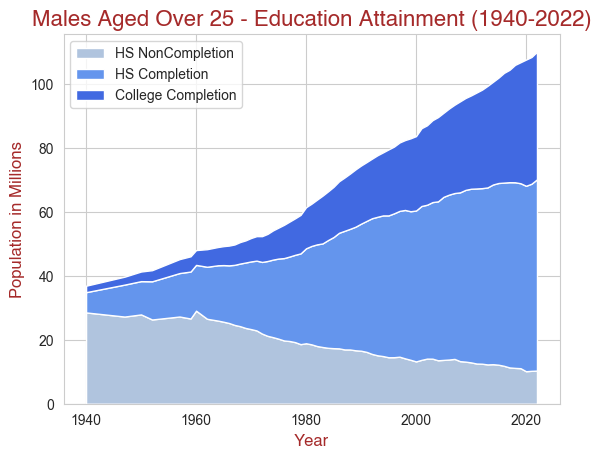

In [26]:
plt.stackplot(year, male_no_hs,
                    male_hs,
                    male_college,
                    labels=all_labels,
                    colors=male_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Males Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population in Millions", fontdict=label_font)

plt.legend(loc='upper left')

#Save graph
plt.savefig('male_stackedchart_total.png')

#Show the graph
plt.show()

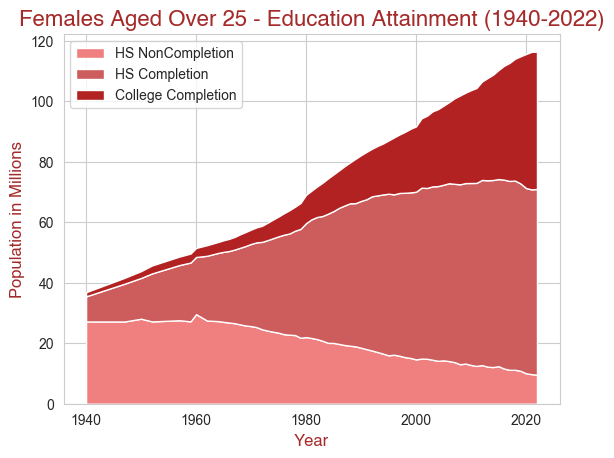

In [27]:
plt.stackplot(year, female_no_hs,
                    female_hs,
                    female_college,
                    labels=all_labels,
                    colors=female_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Females Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population in Millions", fontdict=label_font)

plt.legend(loc='upper left')

#Save graph
plt.savefig('female_stackedchart_total.png')

#Show the graph
plt.show()

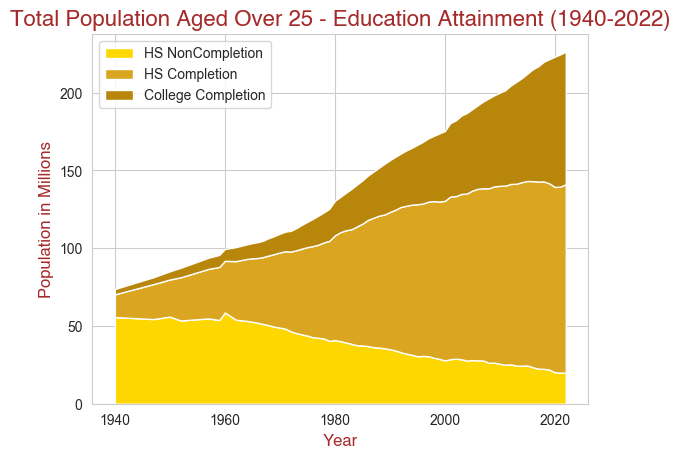

In [28]:
plt.stackplot(year, total_no_hs,
                    total_hs,
                    total_college,
                    labels=all_labels,
                    colors=all_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Total Population Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population in Millions", fontdict=label_font)

plt.legend(loc='upper left')

#Save graph
plt.savefig('total_stackedchart_total.png')

#Show the graph
plt.show()

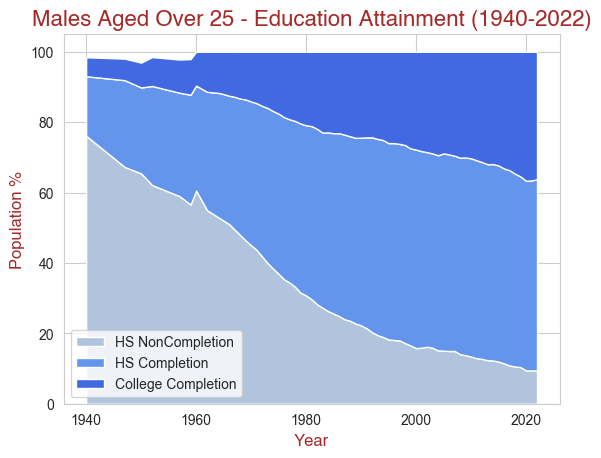

In [29]:
plt.stackplot(year, Male_HS_NonCompletion_Percentage,
                    Male_HS_Completion_Percentage,
                    Male_College_Completion_Percentage,
                    labels=all_labels,
                    colors=male_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Males Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

plt.legend(loc='lower left')

#Save graph
plt.savefig('male_stackedchart_percentage.png')

#Show the graph
plt.show()

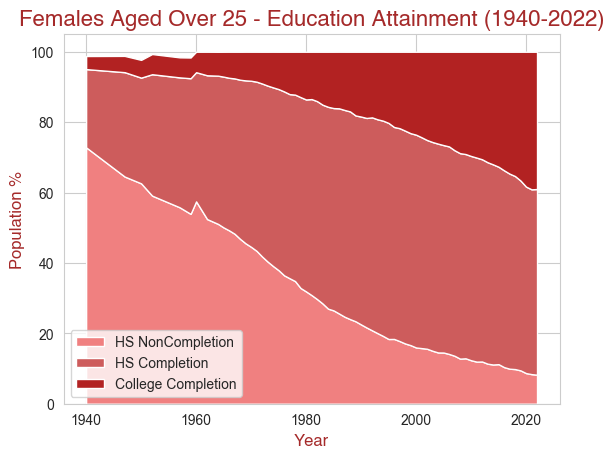

In [30]:
plt.stackplot(year, Female_HS_NonCompletion_Percentage,
                    Female_HS_Completion_Percentage,
                    Female_College_Completion_Percentage,
                    labels=all_labels,
                    colors=female_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Females Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

plt.legend(loc='lower left')

#Save graph
plt.savefig('female_stackedchart_percentage.png')

#Show the graph
plt.show()

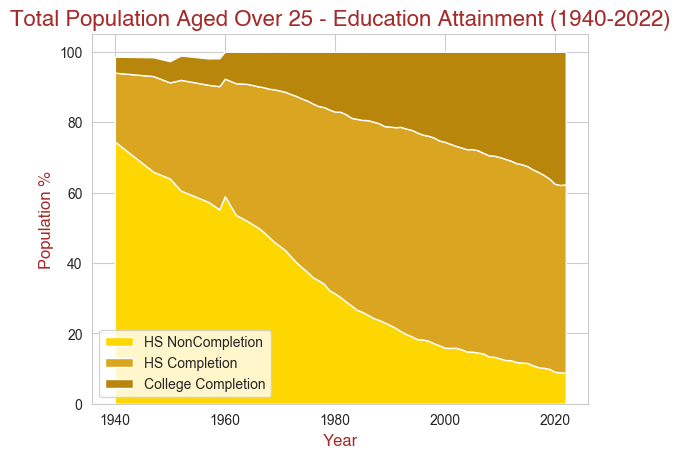

In [31]:
plt.stackplot(year, Total_HS_NonCompletion_Percentage,
                    Total_HS_Completion_Percentage,
                    Total_College_Completion_Percentage,
                    labels=all_labels,
                    colors=all_colors)

#Style Axis Labels
title_font = {'family':'helvetica','color':'brown','size':16}
label_font = {'family':'helvetica','color':'brown','size':12}

#Define Title
plt.title("Total Population Aged Over 25 - Education Attainment (1940-2022)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Year", fontdict=label_font)
plt.ylabel("Population %", fontdict=label_font)

plt.legend(loc='lower left')

#Save graph
plt.savefig('total_stackedchart_percentage.png')

#Show the graph
plt.show()

In [12]:
Male_College_Completion_Percentage

array([36.23691796, 36.55136762, 36.66954993, 35.43465017, 34.64321475,
       33.65668494, 33.16468676, 32.31324899, 31.90611579, 31.95307386,
       31.35580265, 30.82801893, 30.27043862, 30.05297431, 30.09738541,
       29.53939692, 29.17610833, 28.88810658, 29.40664151, 28.89262616,
       28.53924318, 28.23940717, 27.80973795, 27.47566844, 26.50286491,
       26.18720902, 25.95750507, 25.96302682, 25.08944601, 24.77203647,
       24.32390081, 24.33929021, 24.4070894 , 24.46295664, 24.01301609,
       23.56353552, 23.15151864, 23.14481374, 22.92539563, 22.9616639 ,
       21.91518725, 21.12975731, 20.9027676 , 20.38619333, 19.67818791,
       19.19637367, 18.59861901, 17.58667054, 16.8645116 , 15.96660825,
       15.38652557, 14.61695666, 14.13757145, 13.55450608, 13.30627598,
       12.8064957 , 12.50758956, 12.02834978, 11.66717713, 11.38495951,
        9.63810238, 10.12946153,  9.43343144,  8.21374622,  7.0565604 ,
        6.12108786,  5.39465606])